In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
consoles = pd.read_csv('../Data/best-selling_game_consoles.csv')
consoles.head(2)

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Units_number,Price,Price_Inflation,Revenue,Remarks,Mods
0,Telstar,Dedicated,Coleco,1976,1978,1.0,1000000.0,$50.00,$285.00,"$50,000,000.00",Final sales are greater than 1 million,"1,000,000"
1,Atari 2600,Home,Atari,1977,1992,30.0,30000000.0,$199.00,"$1,064.00","$5,970,000,000.00",NaN,NaN


Data Cleaning done in excel: I added the 'Price' column based on https://www.inflationstation.net/, I used https://www.in2013dollars.com/ to find inflation numbers based on 'Price', giving me my 'Price_Inflation'. I then added the 'Mods' column to multiply the 'Units Sold' column by it and get the 'Units_number' column. Then some simple multiplication with 'Units_number' and 'Price' led me to an estimated 'Revenue'. 

In [3]:
consoles = consoles.drop(columns= 'Mods')

In [4]:
consoles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          49 non-null     object 
 1   Type                  49 non-null     object 
 2   Company               49 non-null     object 
 3   Released Year         49 non-null     int64  
 4   Discontinuation Year  49 non-null     int64  
 5   Units sold (million)  49 non-null     float64
 6   Units_number          49 non-null     float64
 7   Price                 49 non-null     object 
 8   Price_Inflation       49 non-null     object 
 9   Revenue               49 non-null     object 
 10  Remarks               16 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ KB


In [5]:
consoles['Price'] = consoles['Price'].str.replace('$', '').astype(float)

In [6]:
consoles['Price_Inflation'] = consoles['Price_Inflation'].str.replace('$', '').str.replace(',', '').astype(float)

In [7]:
consoles['Revenue'] = consoles['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)

In [8]:
consoles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          49 non-null     object 
 1   Type                  49 non-null     object 
 2   Company               49 non-null     object 
 3   Released Year         49 non-null     int64  
 4   Discontinuation Year  49 non-null     int64  
 5   Units sold (million)  49 non-null     float64
 6   Units_number          49 non-null     float64
 7   Price                 49 non-null     float64
 8   Price_Inflation       49 non-null     float64
 9   Revenue               49 non-null     float64
 10  Remarks               16 non-null     object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.3+ KB


Question: The real cost of gaming over time, adjusted for inflation and is it cheaper or more expensive now than in the 80s (40 years)? 

In [9]:
sortedPrice = consoles.sort_values('Price')

<Axes: xlabel='Released Year', ylabel='Price'>

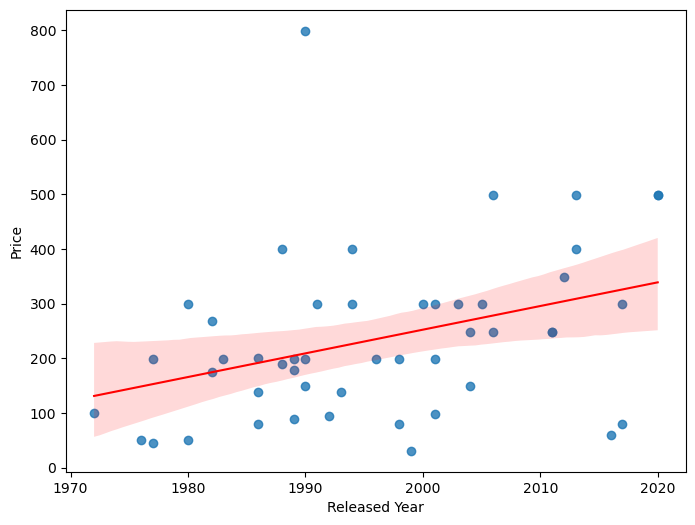

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=sortedPrice["Released Year"],
    y=sortedPrice["Price"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)

<Axes: xlabel='Released Year', ylabel='Price_Inflation'>

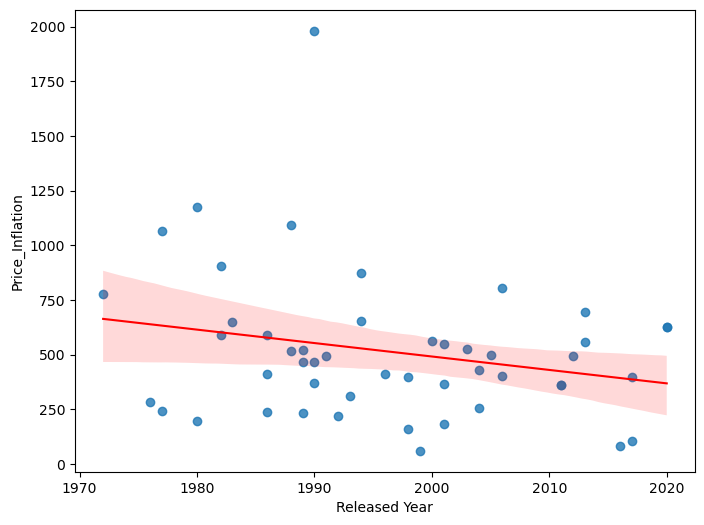

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=sortedPrice["Released Year"],
    y=sortedPrice["Price_Inflation"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)

<Axes: xlabel='Released Year', ylabel='Units sold (million)'>

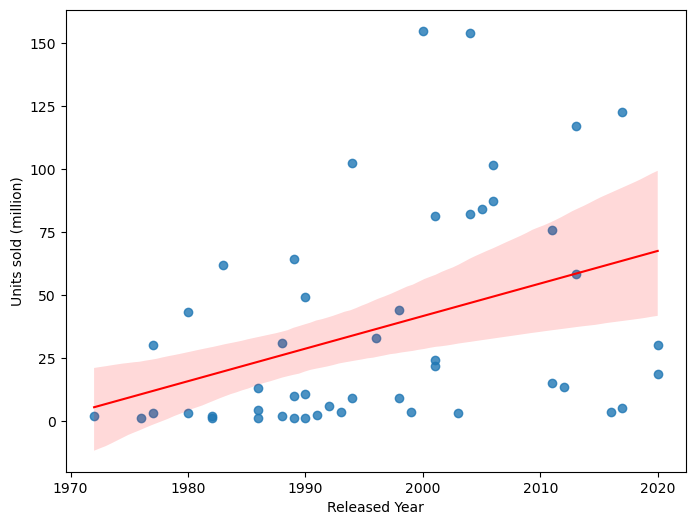

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=sortedPrice["Released Year"],
    y=sortedPrice["Units sold (million)"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)

Analyze: Get all of the consoles between decades and find out how many consoles launched that decade, also find out revenue, and compare that over time.

In [13]:
consoles['Decade'] = (consoles['Released Year'] // 10) * 10

In [15]:
consoles.tail()

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Units_number,Price,Price_Inflation,Revenue,Remarks,Decade
44,NES Classic Edition,Dedicated,Nintendo,2016,2018,3.56,3560000.0,60.0,81.0,2.136000e+08,NaN,2010
45,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,122550000.0,299.0,395.0,3.664245e+10,NaN,2010
46,Super NES Classic Edition,Dedicated,Nintendo,2017,2018,5.28,5280000.0,80.0,106.0,4.224000e+08,NaN,2010
47,PlayStation 5,Home,Sony,2020,0,30.00,30000000.0,499.0,625.0,1.497000e+10,NaN,2020
48,Xbox Series X/S,Home,Microsoft,2020,0,18.50,18500000.0,499.0,625.0,9.231500e+09,Approximately around 18.5 million,2020


In [16]:
consoles['Decade'].value_counts()

Decade
1980    13
1990    12
2000    10
2010     8
1970     4
2020     2
Name: count, dtype: int64